# Agregación de datos por categoría

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [53]:
n = 500
gender_data = []
income_data = []

for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [54]:
gender_data[:10]

['Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female']

In [55]:
income_data[:10]

['Rich',
 'Poor',
 'Middle Class',
 'Middle Class',
 'Middle Class',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Middle Class']

In [56]:
#Z -> N(0,1)
#N(m,s) = m + s*Z -> la media más la desviación estándar por la distribución normal

height = 160 + 30*np.random.randn(n)
weight = 65 + 25*np.random.randn(n)
age = 30 + 12*np.random.randn(n)
income = 18000 + 3500*np.random.randn(n)

In [57]:
data = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic Status": income_data,
        "Height": height,
        "Weight": weight,
        "Age": age,
        "Income": income
    }
)

In [58]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,175.843516,15.708669,35.998319,19916.769383
1,Female,Poor,157.179523,56.841953,32.988077,22287.937754
2,Female,Middle Class,150.744061,68.623674,38.165587,19050.686661
3,Female,Middle Class,166.408910,48.852118,30.590291,22335.328434
4,Female,Middle Class,112.630559,79.651268,19.615483,26347.074407


## Agrupación de datos 

In [59]:
grouped_gender = data.groupby("Gender")

In [60]:
grouped_gender.groups

{'Female': Int64Index([  0,   1,   2,   3,   4,   5,   9,  10,  14,  15,
             ...
             485, 486, 487, 488, 489, 490, 495, 496, 497, 498],
            dtype='int64', length=259),
 'Male': Int64Index([  6,   7,   8,  11,  12,  13,  19,  20,  21,  22,
             ...
             473, 478, 479, 482, 483, 491, 492, 493, 494, 499],
            dtype='int64', length=241)}

In [61]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
0    Female            Rich  175.843516   15.708669  35.998319  19916.769383
1    Female            Poor  157.179523   56.841953  32.988077  22287.937754
2    Female    Middle Class  150.744061   68.623674  38.165587  19050.686661
3    Female    Middle Class  166.408910   48.852118  30.590291  22335.328434
4    Female    Middle Class  112.630559   79.651268  19.615483  26347.074407
5    Female            Poor  149.087224   47.677310  13.418456  21797.462548
9    Female    Middle Class  168.013215    4.006619  23.729687  15881.730957
10   Female            Poor  138.095169   72.729871  17.886750  21683.701706
14   Female    Middle Class  200.182820   52.851591  26.903077  25531.747111
15   Female            Rich  188.871663   63.884449  30.439494  22364.884619
16   Female            Rich  151.503241  118.263077  12.827696  14811.327989
17   Female            Rich  141.299028   67.269649  14.856881  14840

In [62]:
grouped_gender.get_group("Female").head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,175.843516,15.708669,35.998319,19916.769383
1,Female,Poor,157.179523,56.841953,32.988077,22287.937754
2,Female,Middle Class,150.744061,68.623674,38.165587,19050.686661
3,Female,Middle Class,166.408910,48.852118,30.590291,22335.328434
4,Female,Middle Class,112.630559,79.651268,19.615483,26347.074407


In [80]:
double_group = data.groupby(["Gender", "Economic Status"])

In [64]:
for names,group in double_group:
    print(names)
    print(group)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
2    Female    Middle Class  150.744061   68.623674  38.165587  19050.686661
3    Female    Middle Class  166.408910   48.852118  30.590291  22335.328434
4    Female    Middle Class  112.630559   79.651268  19.615483  26347.074407
9    Female    Middle Class  168.013215    4.006619  23.729687  15881.730957
14   Female    Middle Class  200.182820   52.851591  26.903077  25531.747111
18   Female    Middle Class  183.546209   13.052495   5.571462  20730.948038
29   Female    Middle Class  184.972015   73.214906  36.939324  24531.330624
44   Female    Middle Class  202.477249   48.247228   5.842816  15495.910220
46   Female    Middle Class  183.533134   94.687400  24.737261  18930.980932
47   Female    Middle Class  215.421226   58.074714   7.371649  17557.399602
53   Female    Middle Class  170.513081   90.767513  43.657417  20774.617206
54   Female    Middle Class  154.575712   91.9177

## Operaciones sobre datos agrupados

In [65]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     14980.996407  5928.892398  2598.813844  1.676930e+06
       Poor             12806.051244  4787.340618  2232.876439  1.448203e+06
       Rich             13959.535308  6083.557908  2464.074963  1.634265e+06
Male   Middle Class     13215.241819  5596.946754  2483.306563  1.446110e+06
       Poor             13678.010647  5885.796511  2607.689965  1.546659e+06
       Rich             11995.802807  5241.890664  2245.638644  1.416106e+06

In [66]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     164.626334  65.152664  28.558394  18427.806636
       Poor             164.180144  61.376162  28.626621  18566.711110
       Rich             155.105948  67.595088  27.378611  18158.497038
Male   Middle Class     165.190523  69.961834  31.041332  18076.375598
       Poor             160.917772  69.244665  30.678705  18195.991124
       Rich             157.839511  68.972246  29.547877  18632.967823

In [67]:
double_group.size()

Gender  Economic Status
Female  Middle Class       91
        Poor               78
        Rich               90
Male    Middle Class       80
        Poor               85
        Rich               76
dtype: int64

In [68]:
double_group.describe()

Age                                             \
                       count       mean        std       min        25%   
Gender Economic Status                                                    
Female Middle Class     91.0  28.558394  10.404828  2.339464  22.415929   
       Poor             78.0  28.626621  11.752722  6.534342  21.279774   
       Rich             90.0  27.378611  11.515400 -3.680518  19.693526   
Male   Middle Class     80.0  31.041332  10.436427  6.938883  25.123332   
       Poor             85.0  30.678705  13.290653  1.240081  21.438444   
       Rich             76.0  29.547877  12.584602  6.582067  19.927030   

                                                        Height              \
                              50%        75%        max  count        mean   
Gender Economic Status                                                       
Female Middle Class     29.589393  36.019152  51.133294   91.0  164.626334   
       Poor             27.999174  35.016248  57.202139   78.0  164.180144   
       Rich             28.110752  34.002413  56.300942   90.0  155.105948   
Male   Middle Class     31.272408  37.800542  61.249534   80.0  165.190523   
       Poor             28.942400  41.768370  53.261680   85.0  160.917772   
       Rich             27.875222  38.548981  62.006741   76.0  157.839511   

                           ...            Income               Weight  \
                           ...               75%           max  count   
Gender Economic Status     ...                                          
Female Middle Class        ...      20752.782622  26347.074407   91.0   
       Poor                ...      21343.779287  30542.944977   78.0   
       Rich                ...      20255.200895  26647.985812   90.0   
Male   Middle Class        ...      19819.876727  25267.506193   80.0   
       Poor                ...      20339.731042  27203.772306   85.0   
       Rich                ...      20888.584371  27127.882579   76.0   

                                                                               \
                             mean        std        min        25%        50%   
Gender Economic Status                                                          
Female Middle Class     65.152664  26.239197   4.006619  51.727491  61.636923   
       Poor             61.376162  23.981209  -2.644437  45.738653  58.594539   
       Rich             67.595088  23.460370   2.023671  57.710352  68.609398   
Male   Middle Class     69.961834  21.911897  19.989672  54.017398  68.077990   
       Poor             69.244665  23.405309  13.029030  53.866422  67.743870   
       Rich             68.972246  25.113171  -6.614430  54.290774  74.753650   

                                               
                              75%         max  
Gender Economic Status                         
Female Middle Class     81.259664  133.473395  
       Poor             76.537867  121.143485  
       Rich             82.975056  118.263077  
Male   Middle Class     84.072906  131.162586  
       Poor             87.805840  114.962654  
       Rich             85.821644  119.333216  

[6 rows x 32 columns]

In [69]:
grouped_income = double_group["Income"]

In [70]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      91.0  18427.806636  3450.415836   9578.090732   
       Poor              78.0  18566.711110  4012.692269   8632.198193   
       Rich              90.0  18158.497038  3198.970460  11221.736741   
Male   Middle Class      80.0  18076.375598  2861.547141  11029.206404   
       Poor              85.0  18195.991124  2748.106159  11033.957455   
       Rich              76.0  18632.967823  3489.244397  11612.190801   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     16439.600816  18519.191637  20752.782622  26347.074407  
       Poor             16105.329868  18312.837455  21343.779287  30542.944977  
       Rich             15801.413768  18040.668121  20255.200895  26647.985812  
Male   Middle Class     16235.495722  17655.129643  19819.876727  25267.506193  
       Poor             16401.105657  18296.645501  20339.731042  27203.772306  
       Rich             16142.706415  18774.707619  20888.584371  27127.882579

In [71]:
double_group.aggregate(
    {
        "Income": np.sum, #Suma
        "Age": np.mean, #Promedio
        "Height": np.std #Desviación estándar
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.676930e+06  28.558394  30.067142
       Poor             1.448203e+06  28.626621  30.986677
       Rich             1.634265e+06  27.378611  31.038288
Male   Middle Class     1.446110e+06  31.041332  24.488888
       Poor             1.546659e+06  30.678705  30.864097
       Rich             1.416106e+06  29.547877  29.513585

In [72]:
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h:np.mean(h)/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     28.558394  5.505625
       Poor             28.626621  5.332705
       Rich             27.378611  5.025242
Male   Middle Class     31.041332  6.788089
       Poor             30.678705  5.244695
       Rich             29.547877  5.383565

In [73]:
double_group.aggregate([np.sum,np.mean,np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     14980.996407  164.626334  30.067142  5928.892398   
       Poor             12806.051244  164.180144  30.986677  4787.340618   
       Rich             13959.535308  155.105948  31.038288  6083.557908   
Male   Middle Class     13215.241819  165.190523  24.488888  5596.946754   
       Poor             13678.010647  160.917772  30.864097  5885.796511   
       Rich             11995.802807  157.839511  29.513585  5241.890664   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     65.152664  26.239197  2598.813844  28.558394   
       Poor             61.376162  23.981209  2232.876439  28.626621   
       Rich             67.595088  23.460370  2464.074963  27.378611   
Male   Middle Class     69.961834  21.911897  2483.306563  31.041332   
       Poor             69.244665  23.405309  2607.689965  30.678705   
       Rich             68.972246  25.113171  2245.638644  29.547877   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     10.404828  1.676930e+06  18427.806636  3450.415836  
       Poor             11.752722  1.448203e+06  18566.711110  4012.692269  
       Rich             11.515400  1.634265e+06  18158.497038  3198.970460  
Male   Middle Class     10.436427  1.446110e+06  18076.375598  2861.547141  
       Poor             13.290653  1.546659e+06  18195.991124  2748.106159  
       Rich             12.584602  1.416106e+06  18632.967823  3489.244397

In [74]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.505625  2.496785  2.759931  5.370338
       Poor             5.332705  2.575909  2.451509  4.656945
       Rich             5.025242  2.897387  2.390885  5.708157
Male   Middle Class     6.788089  3.213014  2.993091  6.356849
       Poor             5.244695  2.976060  2.321991  6.660580
       Rich             5.383565  2.764706  2.363540  5.375598

## Filtrado de datos

In [75]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      35.998319
2      38.165587
3      30.590291
4      19.615483
6      42.832741
7      51.007647
8      28.421902
9      23.729687
11     36.779024
13     28.039464
14     26.903077
15     30.439494
16     12.827696
17     14.856881
18      5.571462
20     19.267716
21     43.363767
22     37.746472
27     22.152700
28     19.799831
29     36.939324
30     20.592774
33     50.940114
34     32.631862
36     21.776005
37     30.764062
38     43.342399
42     27.537985
44      5.842816
45     37.077690
         ...    
459    19.584607
460    47.767052
461    17.927134
462    14.114383
463    24.696779
464    52.995922
465    22.785175
468    45.694610
469    45.056549
470    34.218383
471    22.006098
474    41.877440
475    44.753898
477    13.117445
478    23.501671
481    25.719522
483    52.133825
484    31.784492
486    35.238253
487    16.479207
488    48.848600
489    13.871981
490     2.788875
492    31.786853
494    39.827198
495    20.143617
496    29.611680
497    21.2652

## Transformación de variables

In [82]:
zscore = lambda x: (x - x.mean())/x.std()

In [83]:
z_group = double_group.transform(zscore)

(array([  9.,  20.,  51.,  83., 105.,  99.,  77.,  42.,   8.,   6.]),
 array([-2.69718202, -2.13801417, -1.57884632, -1.01967847, -0.46051062,
         0.09865722,  0.65782507,  1.21699292,  1.77616077,  2.33532862,
         2.89449647]),
 <a list of 10 Patch objects>)

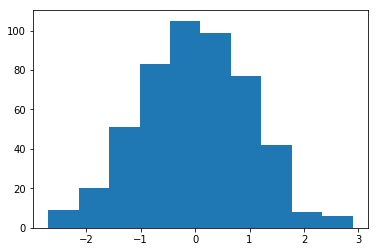

In [84]:
plt.hist(z_group["Age"])

In [85]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [86]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,175.843516,15.708669,35.998319,19916.769383
1,157.179523,56.841953,32.988077,22287.937754
2,150.744061,68.623674,38.165587,19050.686661
3,166.408910,48.852118,30.590291,22335.328434
4,112.630559,79.651268,19.615483,26347.074407
5,149.087224,47.677310,13.418456,21797.462548
6,234.728201,87.805840,42.832741,16511.082976
7,192.833192,84.260278,51.007647,16401.105657
8,108.998736,101.249090,28.421902,16058.652127
9,168.013215,4.006619,23.729687,15881.730957


## Operaciones diversas muy útiles

In [87]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,175.843516,15.708669,35.998319,19916.769383
1,Female,Poor,157.179523,56.841953,32.988077,22287.937754
2,Female,Middle Class,150.744061,68.623674,38.165587,19050.686661
6,Male,Poor,234.728201,87.805840,42.832741,16511.082976
12,Male,Rich,205.792428,53.078342,10.479739,14667.953841
13,Male,Middle Class,149.510319,106.655752,28.039464,16335.986892


In [88]:
double_group.tail(1) #Última fila de cada una de las colecciones

,Gender,Economic Status,Height,Weight,Age,Income
485,Female,Poor,159.065478,67.339524,46.032639,16104.741735
493,Male,Rich,176.088754,60.958258,25.058394,18520.485287
494,Male,Poor,114.234417,85.697618,39.827198,18864.693385
495,Female,Middle Class,166.209492,74.873985,20.143617,17415.505083
498,Female,Rich,118.366286,63.139474,27.881442,17216.315774
499,Male,Middle Class,164.702980,86.803820,30.182351,16285.035129


In [90]:
double_group.nth(32) #Elemento trigesimosegundo de cada una de las filas

Age      Height        Income      Weight
Gender Economic Status                                                 
Female Middle Class     43.450973  162.555864  21436.712556   55.427855
       Poor             32.917764  188.292390  24954.008928   41.895731
       Rich             17.529756  128.835095  14952.819802   34.521452
Male   Middle Class     29.754590  160.657882  13762.659461   81.863074
       Poor             36.371385  226.149786  14546.551063  114.962654
       Rich             36.292726  180.889543  21828.566159   81.909073

In [91]:
double_group.nth(82)

Age      Height        Income      Weight
Gender Economic Status                                                 
Female Middle Class     24.696779  134.877173  16982.972902   19.214339
       Rich             41.877440  211.012579  14653.736714  105.314561
Male   Poor             23.501671  147.713278  15588.944809   99.163134

In [92]:
data_sorted = data.sort_values(["Age", "Income"])

In [94]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
69,Female,Rich,127.904999,97.579156,-3.680518,14809.347756
221,Male,Poor,169.067141,92.821525,1.240081,21107.253093
109,Female,Rich,165.945773,74.620376,1.397155,19030.919254
71,Male,Poor,164.389958,71.458504,2.073216,21608.419259
377,Female,Middle Class,151.519329,98.156234,2.339464,17123.746542
490,Female,Rich,68.407268,73.309669,2.788875,18938.689206
410,Female,Rich,146.978764,105.621897,3.975223,19907.735356
61,Male,Poor,139.634251,92.316855,5.488063,18073.758300
18,Female,Middle Class,183.546209,13.052495,5.571462,20730.948038
44,Female,Middle Class,202.477249,48.247228,5.842816,15495.910220


In [95]:
age_grouped = data_sorted.groupby("Gender")
age_grouped.head()

,Gender,Economic Status,Height,Weight,Age,Income
69,Female,Rich,127.904999,97.579156,-3.680518,14809.347756
221,Male,Poor,169.067141,92.821525,1.240081,21107.253093
109,Female,Rich,165.945773,74.620376,1.397155,19030.919254
71,Male,Poor,164.389958,71.458504,2.073216,21608.419259
377,Female,Middle Class,151.519329,98.156234,2.339464,17123.746542
490,Female,Rich,68.407268,73.309669,2.788875,18938.689206
410,Female,Rich,146.978764,105.621897,3.975223,19907.735356
61,Male,Poor,139.634251,92.316855,5.488063,18073.758300
63,Male,Poor,180.243184,46.081515,6.191852,14208.060671
399,Male,Rich,147.091672,101.351408,6.582067,17144.043076


In [96]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
366,Female,Poor,158.571879,45.092434,57.202139,15618.994579
338,Male,Rich,147.875324,70.960475,62.006741,20460.962214
